In [97]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from functools import partial
import tensorflow.keras as keras
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split

# Image example

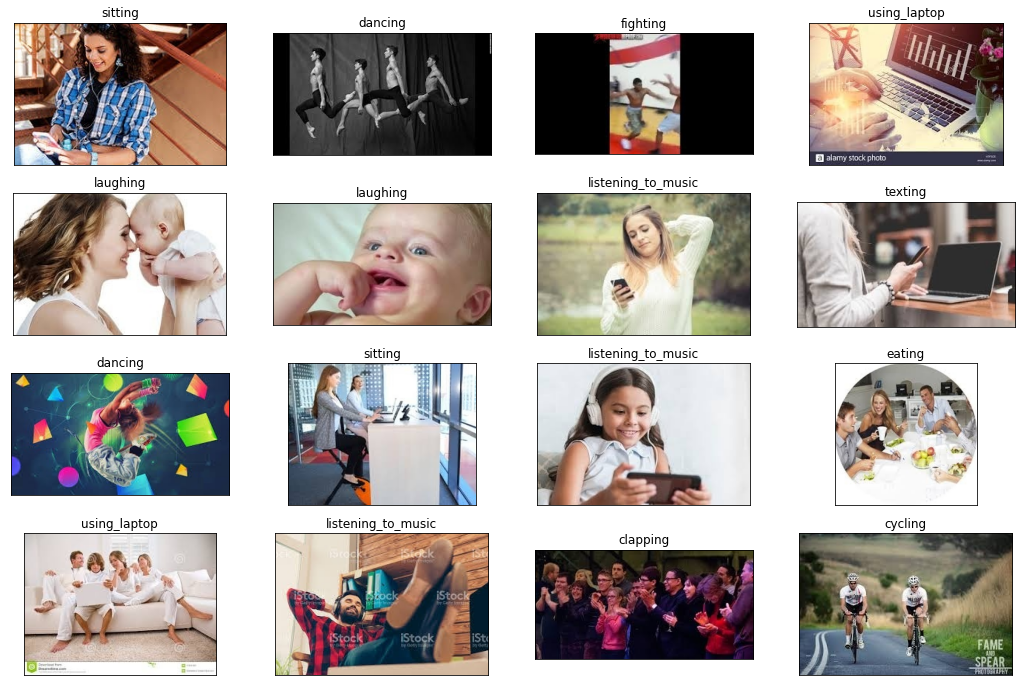

In [2]:
path = "D:/HAR\Human Action Recognition"
X = []
y_temp = pd.read_csv(path+"/Training_set.csv")
y=[]
count=1
fig = plt.figure(figsize=(18, 12))
for i in os.listdir(path+"/train")[:16]:
    temp = cv2.imread(path+"/train/"+i)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    ax = plt.subplot(4, 4, count)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    count+=1
    ax.set_title(y_temp.label[index-1])
    plt.imshow(temp)

# Make y values first and Import image data as many size

In [3]:
path = "D:/HAR\Human Action Recognition"
y_temp = pd.read_csv(path+"/Training_set.csv")
y=[]
for i in os.listdir(path+"/train"):
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    y.append(y_temp.label[index-1])
y = np.array(y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [4]:
pd.Series(y).value_counts()

11    840
3     840
6     840
14    840
8     840
9     840
13    840
5     840
1     840
2     840
4     840
12    840
10    840
0     840
7     840
dtype: int64

In [5]:
def make_image(size=32):
    path = "D:/HAR\Human Action Recognition"
    X = []
    for i in os.listdir(path+"/train"):
        temp = cv2.imread(path+"/train/"+i)
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp = cv2.resize(temp, (size, size))
        X.append(temp)
    X = np.array(X)
    X = X/255.0
    return X

In [6]:
X = make_image(128)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
base_cnn = partial(keras.layers.Conv2D, filters = 32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

In [10]:
filters = 32
Input = keras.Input(shape=[128, 128, 3])
x = base_cnn(filters = filters)(Input)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.GlobalAveragePooling2D()(x)

# x = keras.layers.Dropout(0.3)(x)
Output = keras.layers.Dense(15, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
296/296 [==============================] - 37s 101ms/step - loss: 2.4347 - accuracy: 0.2253 - val_loss: 3.1962 - val_accuracy: 0.1165
Epoch 2/30
296/296 [==============================] - 27s 92ms/step - loss: 2.0827 - accuracy: 0.3186 - val_loss: 2.2698 - val_accuracy: 0.3130
Epoch 3/30
296/296 [==============================] - 27s 92ms/step - loss: 1.8803 - accuracy: 0.3887 - val_loss: 2.2609 - val_accuracy: 0.3394
Epoch 4/30
296/296 [==============================] - 27s 92ms/step - loss: 1.6976 - accuracy: 0.4447 - val_loss: 2.0111 - val_accuracy: 0.3892
Epoch 5/30
296/296 [==============================] - 28s 93ms/step - loss: 1.5239 - accuracy: 0.5052 - val_loss: 1.8772 - val_accuracy: 0.4219
Epoch 6/30
296/296 [==============================] - 28s 93ms/step - loss: 1.3509 - accuracy: 0.5599 - val_loss: 2.0883 - val_accuracy: 0.3832
Epoch 7/30
296/296 [==============================] - 28s 95ms/step - loss: 1.1763 - accuracy: 0.6182 - val_loss: 1.8486 - val_accuracy

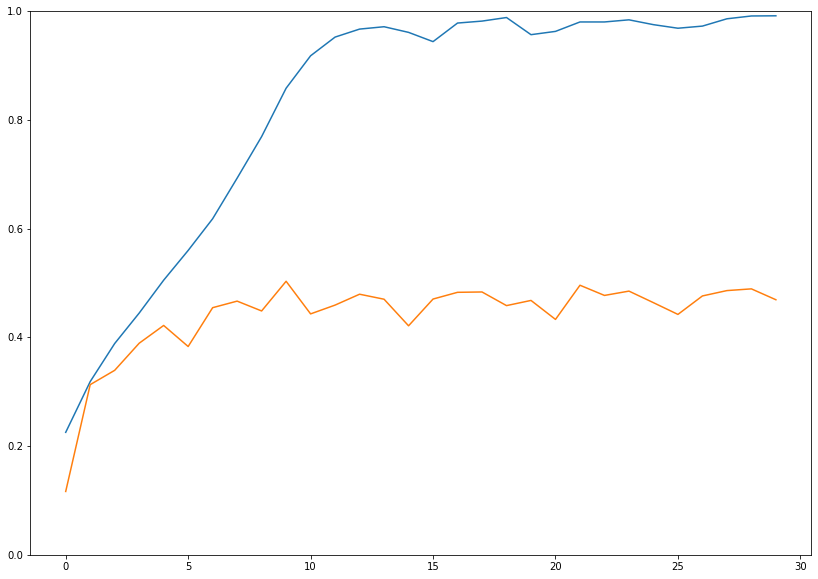

In [15]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# Make keypoint dataset 

In [7]:
tensorflow_lite_model_file = "C:/Users/hjhhi/Desktop/Codes/lite-model_movenet_singlepose_thunder_tflite_float16_4.tflite"
interpreter = tf.lite.Interpreter(tensorflow_lite_model_file)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
output = interpreter.get_output_details()[0]  # Model has single output.
input = interpreter.get_input_details()[0]  # Model has single input.

In [52]:
X_table=[]
for input_data in X_for_pose:
    # input_data = cv2.resize(input_data, (256, 256))
    interpreter.set_tensor(input['index'], [input_data])
    interpreter.invoke()
    result = interpreter.get_tensor(output_details[0]['index'])
    result = result.reshape(51)*255
    X_table.append([result])

In [56]:
X_table = np.array(X_table).reshape(12600, 51)

In [62]:
pd.DataFrame(X_table).to_csv("./X_table.csv")

# Import keypoint data 

In [27]:
pd.read_csv?

In [168]:
X_table = pd.read_csv("./X_table.csv", index_col=0)
X_table = np.array(X_table)

In [142]:
path = "D:/HAR\Human Action Recognition"
X_for_pose = []
y_temp = pd.read_csv(path+"/Training_set.csv")
y_for_pose=[]
for i in os.listdir(path+"/train"):
    temp = cv2.imread(path+"/train/"+i)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp = cv2.resize(temp, (256, 256)).astype("uint8")
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    X_for_pose.append(temp)
    y_for_pose.append(y_temp.label[index-1])
X_for_pose = np.array(X_for_pose)

KeyboardInterrupt: 

In [44]:
X_table

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,61.137794,95.876045,139.935100,49.017170,105.662224,209.244370,49.857640,87.670830,188.633670,48.199093,...,31.615230,245.95260,20.594511,30.558363,255.68901,92.087930,22.120316,260.10828,23.795767,8.927096
1,61.984510,176.955490,98.024860,59.328470,179.933260,117.102530,59.212013,177.539280,84.583380,61.810352,...,86.501610,133.38420,110.249790,45.487198,127.99210,145.223980,41.059040,146.21835,89.636444,60.356113
2,113.110030,118.502140,152.231860,109.969680,121.525314,187.253190,110.424870,115.859280,165.284180,110.758190,...,109.057450,190.64427,119.215740,111.279820,218.86569,111.420460,85.744150,217.56174,116.555200,74.205680
3,112.097725,57.766735,21.421587,101.218660,55.977222,26.410559,102.087310,55.013077,22.516863,92.482310,...,2.928206,173.94801,107.227390,10.523649,164.81691,147.558730,10.684403,157.32922,136.558290,2.315163
4,94.621800,143.433850,86.032460,74.809370,148.280200,138.452960,75.344400,136.544460,125.320460,64.898450,...,9.579233,225.72672,190.319700,20.200780,252.74144,181.468350,8.345508,253.85979,204.379580,15.207012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,93.791330,156.404100,204.158130,85.322685,169.172640,218.955830,76.797190,145.559450,223.742420,90.450050,...,25.608536,108.57789,56.204468,31.176560,105.62354,7.510505,108.337590,163.16524,25.254530,5.978987
12596,156.479300,79.052155,64.626750,134.220660,95.622940,75.285170,138.374620,64.328250,110.872430,111.984430,...,10.189343,221.22874,19.667950,153.356870,241.22737,142.423690,14.758438,248.27269,43.602417,36.783867
12597,109.327940,147.666370,150.690610,88.516600,167.804500,179.858460,91.855420,128.304340,171.777020,111.896225,...,20.475200,196.05464,66.210880,84.658450,174.44122,226.984500,12.182716,207.00876,88.819210,15.717833
12598,73.545610,160.312000,25.234598,60.623840,176.339920,42.646366,60.629770,153.661270,75.572320,69.341545,...,7.714939,196.09958,111.476440,14.910468,194.12598,105.037830,3.171097,177.45433,89.199560,6.680353


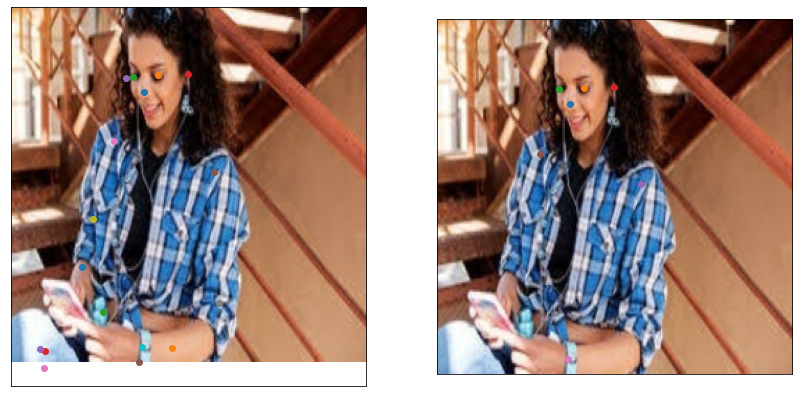

In [70]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(1,2,1)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(X_for_pose[0])
for i in range(17):
#     if X_table[0][2+i*3] < 125:
#         continue
    plt.scatter(X_table[0][1+i*3], X_table[0][0+i*3])

ax = plt.subplot(1,2,2)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(X_for_pose[0])
for i in range(17):
    if X_table[0][2+i*3] < 125:
        continue
    plt.scatter(X_table[0][1+i*3], X_table[0][0+i*3])

In [163]:
for i in range(len(X_table)):
    for j in range(17):
        if X_table[i][2+j*3] < 125:
            X_table[i][1+j*3]=0
            X_table[i][0+j*3]=0            

In [169]:
index = []
for i in range(17):
    index.append(1+i*3)
    index.append(0+i*3) 
temp = X_table[:, index]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(temp, y)

In [171]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=15)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
print("Tree score: ", tree.score(X_test, y_test))
print("KNN score: ", knn.score(X_test, y_test))
print("DNN score: ", model.evaluate(X_test, y_test))

Tree score:  0.36095238095238097
KNN score:  0.2993650793650794
99/99 [==============================] - 0s 4ms/step - loss: 3.5198 - accuracy: 0.1810
DNN score:  [3.5198469161987305, 0.18095238506793976]


In [167]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=15)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
print("Tree score: ", tree.score(X_test, y_test))
print("KNN score: ", knn.score(X_test, y_test))
print("DNN score: ", model.evaluate(X_test, y_test))

Tree score:  0.24793650793650793
KNN score:  0.19333333333333333
99/99 [==============================] - 0s 3ms/step - loss: 2.5776 - accuracy: 0.2251
DNN score:  [2.5776147842407227, 0.22507937252521515]


In [172]:
Input = keras.Input(shape=[34])
x = keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal")(x)
x = keras.layers.BatchNormalization()(x)
prediction = keras.layers.Dense(15, activation="softmax", kernel_initializer="he_normal")(x)

model = keras.models.Model(inputs = Input, outputs = prediction)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
296/296 [==============================] - 5s 11ms/step - loss: 2.4206 - accuracy: 0.2451 - val_loss: 2.4200 - val_accuracy: 0.2800
Epoch 2/10
296/296 [==============================] - 3s 10ms/step - loss: 2.0996 - accuracy: 0.3152 - val_loss: 2.2220 - val_accuracy: 0.3025
Epoch 3/10
296/296 [==============================] - 3s 11ms/step - loss: 1.9909 - accuracy: 0.3492 - val_loss: 2.2026 - val_accuracy: 0.3298
Epoch 4/10
296/296 [==============================] - 3s 10ms/step - loss: 1.9093 - accuracy: 0.3784 - val_loss: 2.1582 - val_accuracy: 0.3324
Epoch 5/10
296/296 [==============================] - 3s 10ms/step - loss: 1.8586 - accuracy: 0.3838 - val_loss: 2.0820 - val_accuracy: 0.3540
Epoch 6/10
296/296 [==============================] - 3s 10ms/step - loss: 1.7882 - accuracy: 0.4143 - val_loss: 2.2464 - val_accuracy: 0.3324
Epoch 7/10
296/296 [==============================] - 3s 10ms/step - loss: 1.7445 - accuracy: 0.4277 - val_loss: 2.2091 - val_accuracy: 0.3571

# Ensemble

In [173]:
model1 = tree
model2 = model
pred1 = model1.predict_proba(X_test)
pred2 = model2.predict(X_test)

In [176]:
pred1.shape

(3150, 15)

In [177]:
pred2.shape

(3150, 15)

In [180]:
final_pred = pred1 + pred2

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(final_pred, axis=-1), )

array([ 6, 10,  6, ...,  9,  5, 14], dtype=int64)